# Fake Instagram Account Detection

## Logistic Regression

### Colab Setup

In [1]:
import os

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/CS3540-Final-Project'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['ToDos.md', 'LICENSE', 'README.md', 'realAccountData.json', 'fakeAccountData.json', 'DataManip.ipynb', 'LogisticRegression.ipynb', 'NeuralNetwork.ipynb', 'RandomForest.ipynb', 'Unsupervised.ipynb', 'XGBoost.ipynb', 'SVM.ipynb', 'Combined.ipynb']


In [3]:
import json

with open(f'{GOOGLE_DRIVE_PATH}/realAccountData.json', 'r') as f:
            realData = json.load(f)
with open(f'{GOOGLE_DRIVE_PATH}/fakeAccountData.json', 'r') as f:
            fakeData = json.load(f)
allData = realData + fakeData

### Setup

In [4]:
# NOTE: Ridge regularization is performed by default

In [5]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

In [6]:
#setting a random seed for reproducibility
random.seed(4)

In [7]:
random.shuffle(allData)

### Linear Logistic Regression

In [8]:
pd.DataFrame(allData).head(10)

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,65,67,79,116,1,0,0,8,0
1,219,337,0,0,1,1,1,7,0
2,252,509,0,28,1,1,0,11,0
3,58,2132,0,0,0,0,0,14,1
4,452,481,0,82,1,1,0,6,0
5,3,157,0,0,0,1,4,9,1
6,0,1,92,9,1,0,1,15,1
7,14,1725,0,0,1,1,4,9,1
8,290,656,0,50,1,1,0,11,0
9,172,187,1,7,1,1,0,10,0


In [9]:
#turning into pandas dataframes
allData_df = pd.DataFrame(allData)


#adding the ones and seperating the data
allData_df.insert(0, 'Ones', 1)
cols = allData_df.shape[1]
X = allData_df.iloc[:,0:cols-1] # iloc slicing function
Y = allData_df.iloc[:,cols-1:cols]


display(allData_df) #making sure this works
# display(X) #making sure this works
# display(^) #making sure this works

,Ones,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,1,65,67,79,116,1,0,0,8,0
1,1,219,337,0,0,1,1,1,7,0
2,1,252,509,0,28,1,1,0,11,0
3,1,58,2132,0,0,0,0,0,14,1
4,1,452,481,0,82,1,1,0,6,0
...,...,...,...,...,...,...,...,...,...,...
1189,1,234,658,93,2,1,0,0,14,0
1190,1,846,743,22,38,1,0,0,12,0
1191,1,384,219,51,11,1,1,0,12,0
1192,1,323,405,0,69,1,1,0,10,0


In [10]:
#train test split being made
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# and standardizing the X data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test) #you have to do this



In [11]:
# Sklearn linear logistic regression version
y_train_array = np.ravel(y_train)
# print(Y_array)
linear_log = LogisticRegression(random_state=4, max_iter=10000).fit(x_train, y_train_array)

linear_log.score(x_test, y_test)
#result is .9431
#unscaled the result is .9598

0.9431438127090301

In [12]:
linear_log.coef_

array([[ 0.        , -2.39591312,  1.78769512, -0.07206614, -1.98847477,
        -0.87365863, -0.59975807,  0.51283938, -0.31437703]])

In [13]:
linear_log.intercept_

array([-3.86779054])

In [14]:
linear_log.coef_[0][1]

np.float64(-2.395913120069016)

In [15]:
print("name, value")
print(f"intercept,{linear_log.intercept_}")
for i in range(9):
    print(f"{pd.DataFrame(allData).columns[i]},{linear_log.coef_[0][i]}")

name, value
intercept,[-3.86779054]
userFollowerCount,0.0
userFollowingCount,-2.395913120069016
userBiographyLength,1.7876951150657152
userMediaCount,-0.07206614373450429
userHasProfilPic,-1.9884747657944315
userIsPrivate,-0.8736586304568114
usernameDigitCount,-0.5997580715440564
usernameLength,0.5128393809401931
isFake,-0.31437703130663375


In [16]:
# Sklearn polynomial logistic regression version
poly = PolynomialFeatures(degree=2)
x_train_mod = x_train[:,1:cols] #removing the ones column from X
X_poly = poly.fit_transform(x_train_mod)

poly_log = LogisticRegression(random_state=4, max_iter=10000).fit(X_poly, y_train_array)

x_test_mod = x_test[:,1:cols] #removing the ones column from X
X_poly_test = poly.fit_transform(x_test_mod)
poly_log.score(X_poly_test,y_test)
#result is .9565
#it is much faster when scaled (only a few seconds)

0.9565217391304348

In [17]:
#figure out how to add a regularization term

In [18]:
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)
# poly = PolynomialFeatures(degree=2)
# x_train_mod = x_train.iloc[:,1:cols] #removing the ones column from X
# X_poly = poly.fit_transform(x_train_mod)

# poly_log = LogisticRegression(random_state=4, max_iter=10000).fit(X_poly, y_train_array)

# x_test_mod = x_test.iloc[:,1:cols] #removing the ones column from X
# X_poly_test = poly.fit_transform(x_test_mod)
# poly_log.score(X_poly_test,y_test)
# #took 8 minutes, maxed out iterations and did not converge
# #result is .9766

In [19]:
#function that you will use to convert matrix to dataframe, useful for visulization.
def conf_matrix_to_df(conf_matrix, target_names):
    return pd.DataFrame(conf_matrix, columns=target_names, index=target_names)

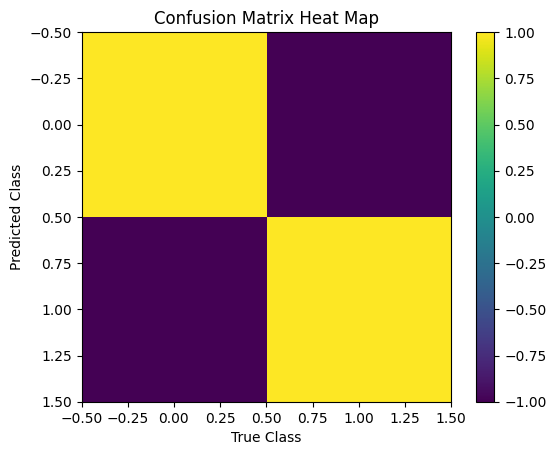

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       246
           1       0.89      0.77      0.83        53

    accuracy                           0.94       299
   macro avg       0.92      0.88      0.90       299
weighted avg       0.94      0.94      0.94       299

specificity: 0.9796747967479674
recall: 0.7735849056603774
precision: 0.8913043478260869
accuracy: 0.9431438127090301


In [20]:
#linear model results
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

y_test_array = np.ravel(y_test)
linear_log_pred = linear_log.predict(X = x_test)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = linear_log_pred)
conf_matrix_scaler = preprocessing.StandardScaler().fit(conf_matrix)
conf_matrix_scaled = conf_matrix_scaler.transform(conf_matrix)


# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

linear_log_report = classification_report(y_true = y_test, y_pred = linear_log_pred)
print(linear_log_report)

#this is to double check everything
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")


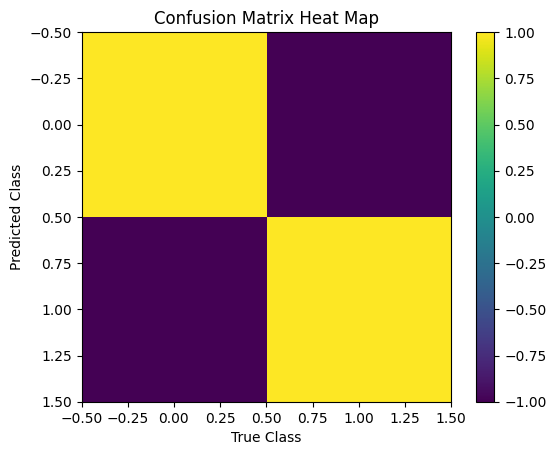

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       246
           1       0.92      0.83      0.87        53

    accuracy                           0.96       299
   macro avg       0.94      0.91      0.92       299
weighted avg       0.96      0.96      0.96       299

specificity: 0.983739837398374
recall: 0.8301886792452831
precision: 0.9166666666666666
accuracy: 0.9565217391304348


In [21]:
#polynomial model results

x_test_mod = x_test[:,1:cols] #removing the ones column from X
X_poly_test = poly.fit_transform(x_test_mod)

poly_log_pred = poly_log.predict(X = X_poly_test)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = poly_log_pred)
conf_matrix_scaler = preprocessing.StandardScaler().fit(conf_matrix)
conf_matrix_scaled = conf_matrix_scaler.transform(conf_matrix)


# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

poly_log_report = classification_report(y_true = y_test, y_pred = poly_log_pred)
print(poly_log_report)


#this is to double check everything
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")

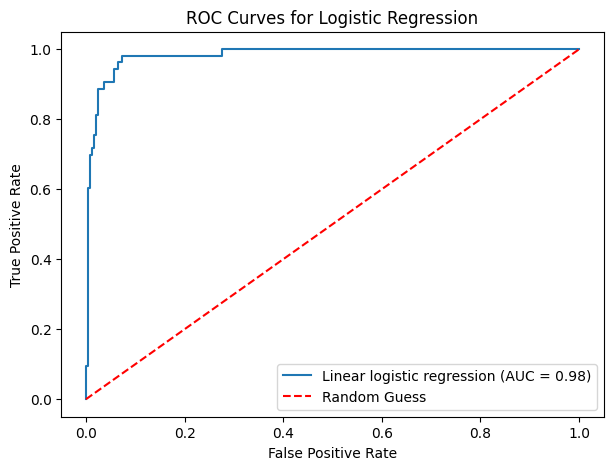

In [22]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
# other option for how things could work

#code based off of code from: https://www.geeksforgeeks.org/machine-learning/auc-roc-curve/

y_pred_linear = linear_log.predict_proba(x_test)[:, 1]
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_linear)
linear_roc_auc = auc(fpr_logistic, tpr_logistic)

y_pred_poly = poly_log.predict_proba(X_poly_test)[:, 1]
fpr2_logistic, tpr2_logistic, _2 = roc_curve(y_test, y_pred_poly)
poly_roc_auc = auc(fpr2_logistic, tpr2_logistic)

plt.figure(figsize=(7, 5))
plt.plot(fpr_logistic, tpr_logistic, label=f'Linear logistic regression (AUC = {linear_roc_auc:.2f})')
# plt.plot(fpr2_logistic, tpr2_logistic, label=f'Polynomial logistic regression (AUC = {poly_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression')
plt.legend()
plt.show()

# print(f"linear logistic regression AOC of ROC: {linear_roc_auc}")
# print(f"polynomial logistic regression AOC of ROC: {poly_roc_auc}")

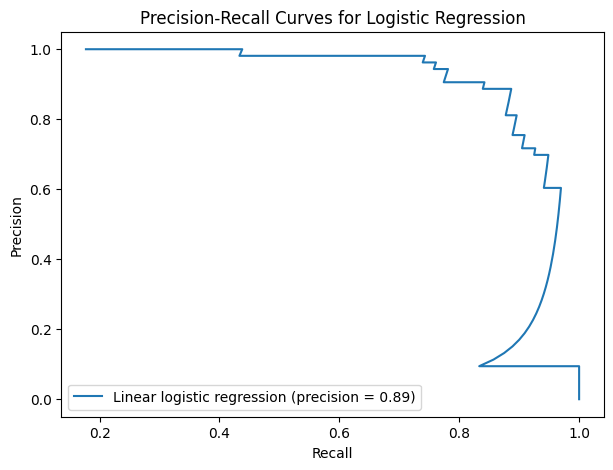

linear logistic regression precision: 0.8913043478260869
linear logistic regression recall: 0.7735849056603774


In [23]:
y_pred_linear = linear_log.predict_proba(x_test)[:, 1]
linear_log_pred = linear_log.predict(X = x_test)
precision, recall, _ = precision_recall_curve(y_test, y_pred_linear)
linear_precision = precision_score(y_test, linear_log_pred)
linear_recall = recall_score(y_test, linear_log_pred)


y_pred_poly = poly_log.predict_proba(X_poly_test)[:, 1]
poly_log_pred = poly_log.predict(X = X_poly_test)
precision2, recall2, _2 = precision_recall_curve(y_test, y_pred_poly)
poly_precision = precision_score(y_test, poly_log_pred)
poly_recall = recall_score(y_test, poly_log_pred)

plt.figure(figsize=(7, 5))
plt.plot(precision, recall, label=f'Linear logistic regression (precision = {linear_precision:.2f})')
# plt.plot(precision2, recall2, label=f'Polynomial logistic regression (precision = {poly_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Logistic Regression')
plt.legend()
plt.show()

print(f"linear logistic regression precision: {linear_precision}")
print(f"linear logistic regression recall: {linear_recall}")

# print(f"polynomial logistic regression precision: {poly_precision}")
# print(f"polynomial logistic regression recall: {poly_recall}")


### Cross Validation

In [24]:
linear_log = LogisticRegression(random_state=4, max_iter=10000)

In [25]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import recall_score, make_scorer

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=4)

scores = cross_val_score(linear_log, X, np.ravel(Y), cv=kf, scoring="accuracy")
recall = cross_val_score(linear_log, X, np.ravel(Y), cv=kf, scoring="recall")
precision = cross_val_score(linear_log, X, np.ravel(Y), cv=kf, scoring="precision")
f1 = cross_val_score(linear_log, X, np.ravel(Y), cv=kf, scoring="f1")
auc = cross_val_score(linear_log, X, np.ravel(Y), cv=kf, scoring="roc_auc")

specificity_scorer = make_scorer(recall_score, pos_label=0)
specificity = cross_val_score(linear_log, X, np.ravel(Y), cv=kf, scoring=specificity_scorer)

print(f"Avg K-Fold accuracy: {np.mean(scores)}")
print(f"Avg K-Fold precision: {np.mean(precision)}")
print(f"Avg K-Fold recall: {np.mean(recall)}")
print(f"Avg K-Fold specificity: {np.mean(specificity)}")
print(f"Avg K-Fold f1: {np.mean(f1)}")
print(f"Avg K-Fold auc: {np.mean(auc)}")

Avg K-Fold accuracy: 0.9480784782532259
Avg K-Fold precision: 0.879300457225989
Avg K-Fold recall: 0.792891125594698
Avg K-Fold specificity: 0.9789288948043137
Avg K-Fold f1: 0.8327131982736595
Avg K-Fold auc: 0.9686482542489205


## Neural Network

### Colab Setup

In [26]:
import os

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [27]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/CS3540-Final-Project/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['ToDos.md', 'LICENSE', 'README.md', 'realAccountData.json', 'fakeAccountData.json', 'DataManip.ipynb', 'LogisticRegression.ipynb', 'NeuralNetwork.ipynb', 'RandomForest.ipynb', 'Unsupervised.ipynb', 'XGBoost.ipynb', 'SVM.ipynb', 'Combined.ipynb']


In [28]:
import json

with open(f'{GOOGLE_DRIVE_PATH}realAccountData.json', 'r') as f:
            realData = json.load(f)
with open(f'{GOOGLE_DRIVE_PATH}fakeAccountData.json', 'r') as f:
            fakeData = json.load(f)
allData = realData + fakeData

### Setup

In [29]:
# import needed libraries
from __future__ import absolute_import, division, print_function, unicode_literals

# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

# Helper libraries

print(tf.__version__)

2.19.0


In [30]:
#setting a random seed for reproducibility
import random
random.seed(4)
tf.random.set_seed(4)
np.random.seed(4)

random.shuffle(allData)


In [31]:
allData_df = pd.DataFrame(allData)
cols = allData_df.shape[1]
X = allData_df.iloc[:,0:cols-1] # iloc slicing function
Y = allData_df.iloc[:,cols-1:cols]

In [32]:
#train test split being made
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# and standardizing the X data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=4)  #getting validation set

scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test) #you have to do this
x_val = scaler.transform(x_val) #you have to do this



In [33]:
print (x_train.shape, y_train.shape)
print (x_val.shape, y_val.shape)
print (x_test.shape, y_test.shape)

(716, 8) (716, 1)
(179, 8) (179, 1)
(299, 8) (299, 1)


In [34]:
# defining the stopping parameter for early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)


### Defining the First Neural Network (1 layer)

In [35]:
layers1 = [
    Flatten(),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(50, activation = "relu"),
    #Add your second layer details here
    Dense(1, activation = "sigmoid")
]

model1 = Sequential(layers1)

model1.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, batch_size=16, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7592 - loss: 0.6664 - val_accuracy: 0.7989 - val_loss: 0.5557
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8667 - loss: 0.4648 - val_accuracy: 0.8268 - val_loss: 0.4199
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9090 - loss: 0.3374 - val_accuracy: 0.8715 - val_loss: 0.3407
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9254 - loss: 0.2592 - val_accuracy: 0.8771 - val_loss: 0.2949
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9400 - loss: 0.2134 - val_accuracy: 0.8771 - val_loss: 0.2675
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9412 - loss: 0.1860 - val_accuracy: 0.8827 - val_loss: 0.2498
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9506 - loss: 0.1685 - val_accuracy: 0.8883 - val_loss: 0.2375
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9544 - loss: 0.1565 - val_accuracy: 0.8939 - 

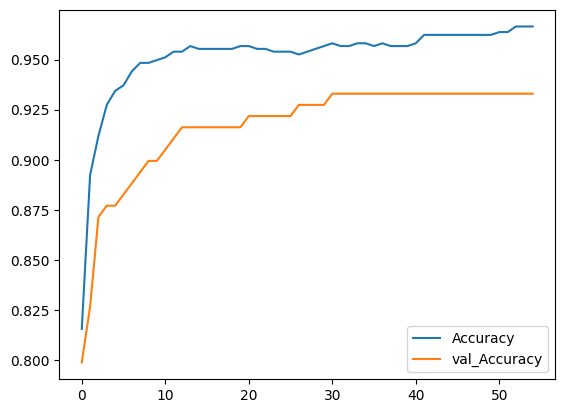

In [36]:
plt.plot(history1.history['accuracy'], label="Accuracy")
plt.plot(history1.history['val_accuracy'], label="val_Accuracy")
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


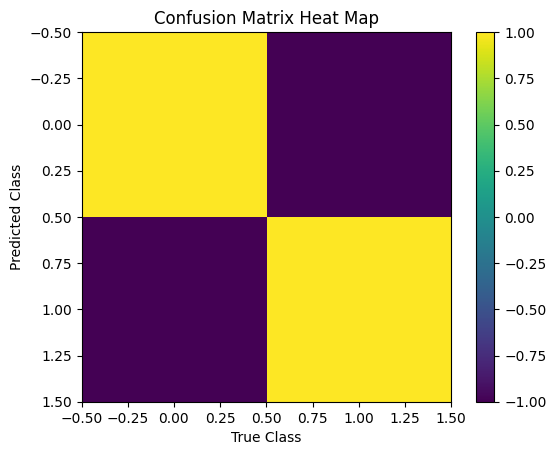

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       246
           1       0.94      0.83      0.88        53

    accuracy                           0.96       299
   macro avg       0.95      0.91      0.93       299
weighted avg       0.96      0.96      0.96       299

specificity: 0.9878048780487805
recall: 0.8301886792452831
precision: 0.9361702127659575
accuracy: 0.959866220735786
AUC: 0.9898757478140819


In [37]:
#model 1 results
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

y_test_array = np.ravel(y_test)
network1_pred = model1.predict(x_test)
network1_pred = (network1_pred > 0.5).astype(int)

network1_proba = model1.predict(x_test).ravel()
auc1 = roc_auc_score(y_test, network1_proba)
fpr1_nn, tpr1_nn, _ = roc_curve(y_test, network1_proba)

conf_matrix1 = confusion_matrix(y_true = y_test, y_pred = network1_pred)
conf_matrix_scaler1 = preprocessing.StandardScaler().fit(conf_matrix1)
conf_matrix_scaled1 = conf_matrix_scaler1.transform(conf_matrix1)

# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled1)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

network1_report = classification_report(y_true = y_test, y_pred = network1_pred)
print(network1_report)

#this is to double check everything
tn, fp, fn, tp = conf_matrix1.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")
print(f"AUC: {auc1}")


#note, the low recall is not that huge of a problem, as we are trying to have as high of a precision as possible

### Defining the Next Neural Network (2 layers)

In [38]:
#for some reason, I need to define early stopping again each time
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [39]:
layers2 = [
    Flatten(),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(50, activation = "relu"),
    Dense(50, activation = "relu"),
    #Add your second layer details here
    Dense(1, activation = "sigmoid")
]

model2 = Sequential(layers2)

model2.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, batch_size=16, epochs= 100, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8268 - loss: 0.5440 - val_accuracy: 0.8659 - val_loss: 0.3358
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8898 - loss: 0.2790 - val_accuracy: 0.8883 - val_loss: 0.2485
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9330 - loss: 0.1833 - val_accuracy: 0.8939 - val_loss: 0.2263
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9465 - loss: 0.1511 - val_accuracy: 0.9050 - val_loss: 0.2104
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9519 - loss: 0.1340 - val_accuracy: 0.9106 - val_loss: 0.1959
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9507 - loss: 0.1230 - val_accuracy: 0.9106 - val_loss: 0.1845
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9523 - loss: 0.1128 - val_accuracy: 0.9106 - val_loss: 0.1751
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9530 - loss: 0.1043 - val_accuracy: 0.9162 - 

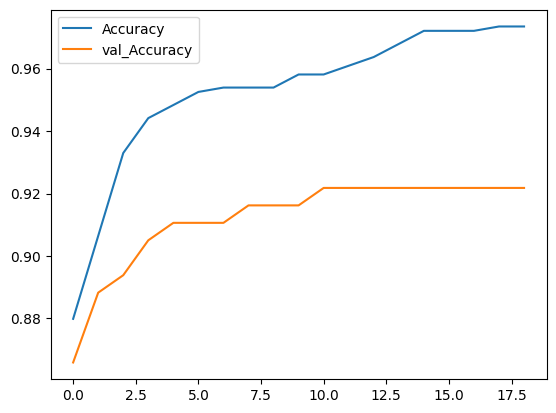

In [40]:
plt.plot(history2.history['accuracy'], label="Accuracy")
plt.plot(history2.history['val_accuracy'], label="val_Accuracy")
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


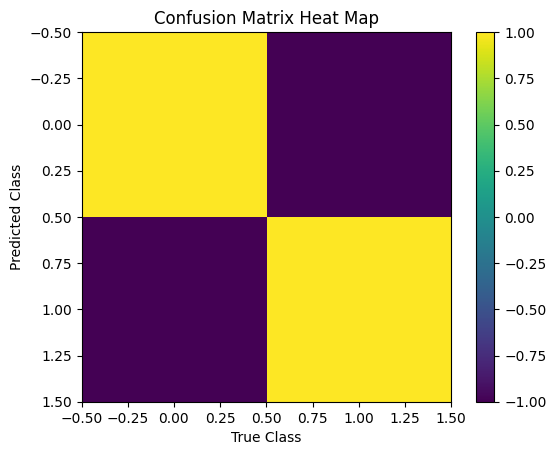

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       246
           1       0.98      0.79      0.88        53

    accuracy                           0.96       299
   macro avg       0.97      0.89      0.93       299
weighted avg       0.96      0.96      0.96       299

specificity: 0.9959349593495935
recall: 0.7924528301886793
precision: 0.9767441860465116
accuracy: 0.959866220735786
AUC: 0.9884184690903512


In [41]:
#model 2 results
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

network2_pred = model2.predict(x_test)
network2_pred = (network2_pred > 0.5).astype(int)

network2_proba = model2.predict(x_test).ravel()
auc2 = roc_auc_score(y_test, network2_proba)
fpr2_nn, tpr2_nn, _ = roc_curve(y_test, network2_proba)

conf_matrix2 = confusion_matrix(y_true = y_test, y_pred = network2_pred)
conf_matrix_scaler2 = preprocessing.StandardScaler().fit(conf_matrix2)
conf_matrix_scaled2 = conf_matrix_scaler2.transform(conf_matrix2)

# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled2)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

network2_report = classification_report(y_true = y_test, y_pred = network2_pred)
print(network2_report)

#this is to double check everything
tn, fp, fn, tp = conf_matrix2.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")
print(f"AUC: {auc2}")

### Defining the Next Neural Network (5 Layers, Each are Small)

In [42]:
#for some reason, I need to define early stopping again each time
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [43]:
layers3 = [
    Flatten(),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(50, activation = "relu"),
    Dense(100, activation = "relu"),
    Dense(35, activation = "relu"),
    Dense(60, activation = "relu"),
    Dense(100, activation = "relu"),

    #Add your second layer details here
    Dense(1, activation = "sigmoid")
]

model3 = Sequential(layers3)

model3.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, batch_size=16, epochs= 100, validation_data=(x_val, y_val), callbacks=[early_stopping])


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7426 - loss: 0.5921 - val_accuracy: 0.8603 - val_loss: 0.3340
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9328 - loss: 0.2229 - val_accuracy: 0.8771 - val_loss: 0.2455
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9523 - loss: 0.1594 - val_accuracy: 0.8883 - val_loss: 0.2264
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9512 - loss: 0.1324 - val_accuracy: 0.8994 - val_loss: 0.2081
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9644 - loss: 0.1052 - val_accuracy: 0.9106 - val_loss: 0.1880
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9703 - loss: 0.0901 - val_accuracy: 0.9162 - val_loss: 0.1708
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9700 - loss: 0.0841 - val_accuracy: 0.9218 - val_loss: 0.1677
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9760 - loss: 0.0717 - val_accuracy: 0.9218 - v

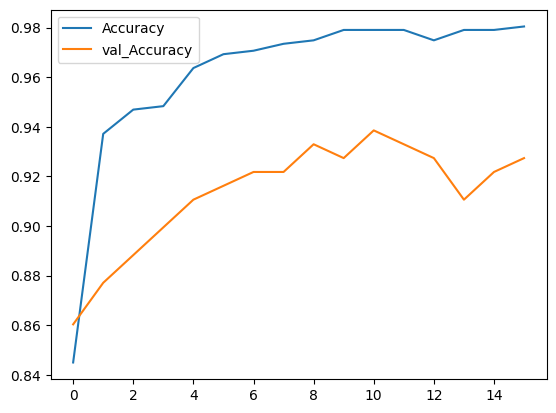

In [44]:
plt.plot(history3.history['accuracy'], label="Accuracy")
plt.plot(history3.history['val_accuracy'], label="val_Accuracy")
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


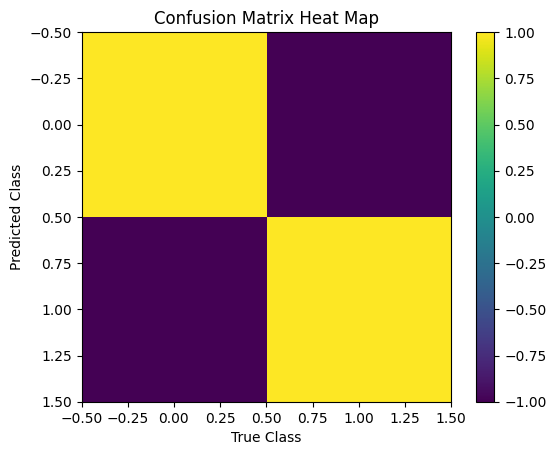

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       246
           1       0.96      0.85      0.90        53

    accuracy                           0.97       299
   macro avg       0.96      0.92      0.94       299
weighted avg       0.97      0.97      0.97       299

specificity: 0.991869918699187
recall: 0.8490566037735849
precision: 0.9574468085106383
accuracy: 0.9665551839464883
AUC: 0.9904126399754564


In [45]:
#model 3 results
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

network3_pred = model3.predict(x_test)
network3_pred = (network3_pred > 0.5).astype(int)

network3_proba = model3.predict(x_test).ravel()
auc3 = roc_auc_score(y_test, network3_proba)
fpr3_nn, tpr3_nn, _ = roc_curve(y_test, network3_proba)

conf_matrix3 = confusion_matrix(y_true = y_test, y_pred = network3_pred)
conf_matrix_scaler3 = preprocessing.StandardScaler().fit(conf_matrix3)
conf_matrix_scaled3 = conf_matrix_scaler3.transform(conf_matrix3)

# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled3)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

network3_report = classification_report(y_true = y_test, y_pred = network3_pred)
print(network3_report)

#this is to double check everything
tn, fp, fn, tp = conf_matrix3.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")
print(f"AUC: {auc3}")

### Exploratory Model With 10 Hidden Layers (More than the Number of Features)

In [46]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

layers4 = [
    Flatten(),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    #Add your second layer details here
    Dense(1, activation = "sigmoid")
]

model4 = Sequential(layers4)

model4.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

history4 = model4.fit(x_train, y_train, batch_size=16, epochs= 100, validation_data=(x_val, y_val), callbacks=[early_stopping])


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7337 - loss: 0.6719 - val_accuracy: 0.8045 - val_loss: 0.5940
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8204 - loss: 0.5436 - val_accuracy: 0.8045 - val_loss: 0.4992
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8204 - loss: 0.4626 - val_accuracy: 0.8045 - val_loss: 0.4280
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8204 - loss: 0.3872 - val_accuracy: 0.8045 - val_loss: 0.3724
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8204 - loss: 0.3244 - val_accuracy: 0.8045 - val_loss: 0.3226
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8204 - loss: 0.2721 - val_accuracy: 0.8045 - val_loss: 0.3023
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8204 - loss: 0.2484 - val_accuracy: 0.8492 - val_loss: 0.2871
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9196 - loss: 0.2313 - val_accuracy: 0.8883 - 

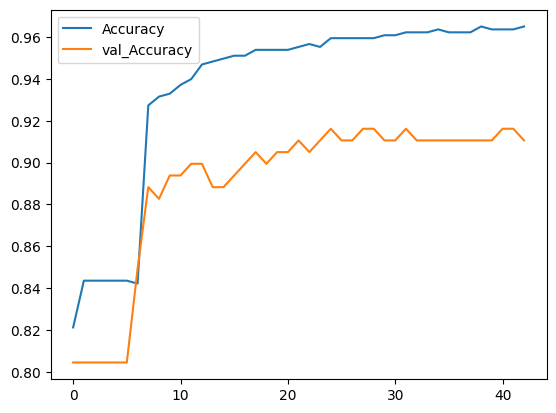

In [47]:
plt.plot(history4.history['accuracy'], label="Accuracy")
plt.plot(history4.history['val_accuracy'], label="val_Accuracy")
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


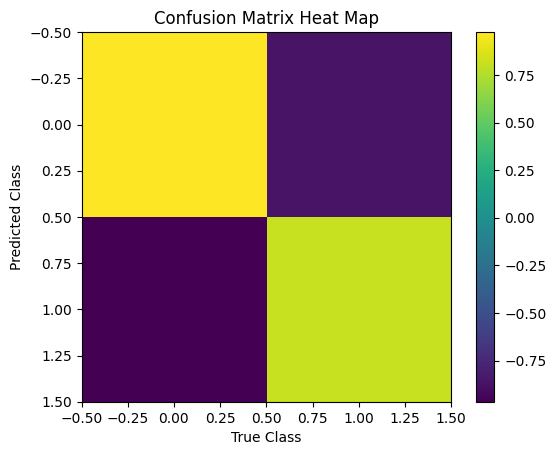

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       246
           1       0.89      0.77      0.83        53

    accuracy                           0.94       299
   macro avg       0.92      0.88      0.90       299
weighted avg       0.94      0.94      0.94       299

specificity: 0.9796747967479674
recall: 0.7735849056603774
precision: 0.8913043478260869
accuracy: 0.9431438127090301
AUC: 0.9858107071636755


In [48]:
#model 4 results
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

network4_pred = model4.predict(x_test)
network4_pred = (network4_pred > 0.5).astype(int)

network4_proba = model4.predict(x_test).ravel()
auc4 = roc_auc_score(y_test, network4_proba)
fpr4_nn, tpr4_nn, _ = roc_curve(y_test, network4_proba)

conf_matrix4 = confusion_matrix(y_true = y_test, y_pred = network4_pred)
conf_matrix_scaler4 = preprocessing.StandardScaler().fit(conf_matrix4)
conf_matrix_scaled4 = conf_matrix_scaler3.transform(conf_matrix4)

# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled4)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

network4_report = classification_report(y_true = y_test, y_pred = network4_pred)
print(network4_report)

#this is to double check everything
tn, fp, fn, tp = conf_matrix4.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")
print(f"AUC: {auc4}")


## Random Forest

### Colab Setup

In [49]:
import os

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [50]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/CS3540-Final-Project/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['ToDos.md', 'LICENSE', 'README.md', 'realAccountData.json', 'fakeAccountData.json', 'DataManip.ipynb', 'LogisticRegression.ipynb', 'NeuralNetwork.ipynb', 'RandomForest.ipynb', 'Unsupervised.ipynb', 'XGBoost.ipynb', 'SVM.ipynb', 'Combined.ipynb']


In [51]:
import json

with open(f'{GOOGLE_DRIVE_PATH}realAccountData.json', 'r') as f:
            realData = json.load(f)
with open(f'{GOOGLE_DRIVE_PATH}fakeAccountData.json', 'r') as f:
            fakeData = json.load(f)
allData = realData + fakeData

### Setup

In [52]:
#imports
# load needed libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc, precision_score, recall_score

# sklearn models
from sklearn.ensemble import RandomForestClassifier

In [53]:
#setting a random seed for reproducibility
import random

random.seed(4)

In [54]:
random.shuffle(allData)

### Random Forest

In [55]:
allData_df = pd.DataFrame(allData)
num_cols = allData_df.shape[1]
X = allData_df.iloc[:,0:num_cols-1] # iloc slicing function
Y = allData_df.iloc[:,num_cols-1:num_cols]
Y = np.ravel(Y)

display(allData_df)

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,65,67,79,116,1,0,0,8,0
1,219,337,0,0,1,1,1,7,0
2,252,509,0,28,1,1,0,11,0
3,58,2132,0,0,0,0,0,14,1
4,452,481,0,82,1,1,0,6,0
...,...,...,...,...,...,...,...,...,...
1189,234,658,93,2,1,0,0,14,0
1190,846,743,22,38,1,0,0,12,0
1191,384,219,51,11,1,1,0,12,0
1192,323,405,0,69,1,1,0,10,0


In [56]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)

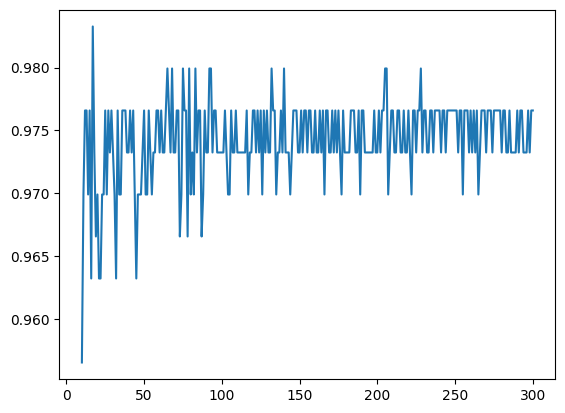

In [57]:
forest_scores = []
for i in range(10, 301):
    random_forest = RandomForestClassifier(n_estimators=i)
    forest_fit = random_forest.fit(x_train, y_train)
    forest_score = forest_fit.score(x_test, y_test)
    forest_scores.append(forest_score)

x =list(range(10, 301))
y = forest_scores

plt.plot(x, y)
plt.show()

In [58]:
final_rf = RandomForestClassifier(random_state=4)
final_rf_fit = final_rf.fit(x_train, y_train)
final_rf_score = final_rf_fit.score(x_test, y_test)
print(final_rf_score)

0.9765886287625418


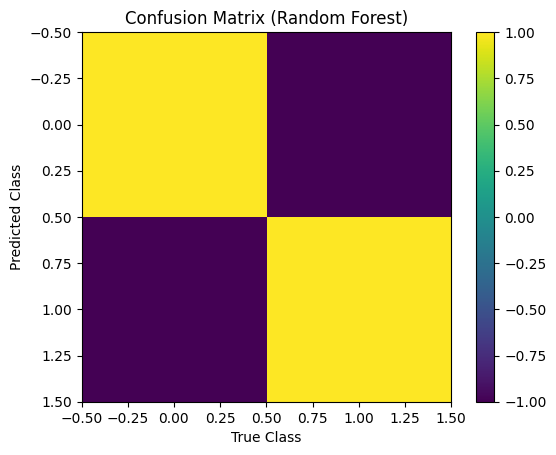

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       246
           1       0.93      0.94      0.93        53

    accuracy                           0.98       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.98      0.98      0.98       299



In [59]:
# Model Results
from sklearn.preprocessing import StandardScaler

y_test_array = np.ravel(y_test)
rf_predicted = final_rf.predict(X = x_test)

conf_matrix = confusion_matrix(y_true = y_test, y_pred = rf_predicted)
conf_matrix_scaler = StandardScaler().fit(conf_matrix)
conf_matrix_scaled = conf_matrix_scaler.transform(conf_matrix)


# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix (Random Forest)')
plt.imshow(conf_matrix_scaled)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

rf_classification_report = classification_report(y_true = y_test, y_pred = rf_predicted)
print(rf_classification_report)

In [60]:
# Classification Report (Manual)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")

specificity: 0.983739837398374
recall: 0.9433962264150944
precision: 0.9259259259259259
accuracy: 0.9765886287625418


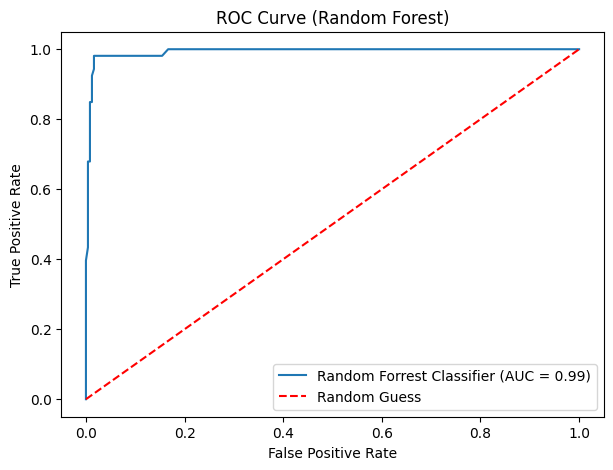

Random Forrest Classifier ROC-AUC: 0.9927136063813469


In [61]:
# ROC Curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
# other option for how things could work
y_score = final_rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score)
rf_roc_auc = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(7, 5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forrest Classifier (AUC = {rf_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend()
plt.show()

print(f"Random Forrest Classifier ROC-AUC: {rf_roc_auc}")


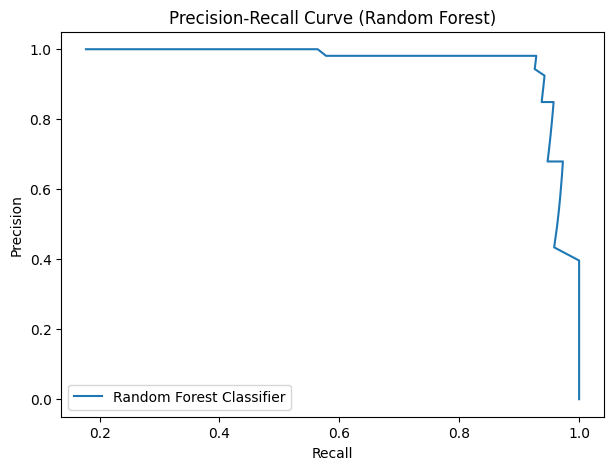

Random Forrest Classifier Precision: 0.9259259259259259
Random Forrest Classifier Recall: 0.9433962264150944


In [62]:
# Precision-Recall Curve
y_score = final_rf.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_score)
rf_precision_score = precision_score(y_test, rf_predicted)
rf_recall_score = recall_score(y_test, rf_predicted)

plt.figure(figsize=(7, 5))
plt.plot(precision, recall, label=f'Random Forest Classifier')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.legend()
plt.show()

print(f"Random Forrest Classifier Precision: {rf_precision_score}")
print(f"Random Forrest Classifier Recall: {rf_recall_score}")


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'userFollowerCount'),
  Text(1, 0, 'userFollowingCount'),
  Text(2, 0, 'userMediaCount'),
  Text(3, 0, 'userHasProfilPic'),
  Text(4, 0, 'usernameDigitCount'),
  Text(5, 0, 'usernameLength'),
  Text(6, 0, 'userBiographyLength'),
  Text(7, 0, 'userIsPrivate')])

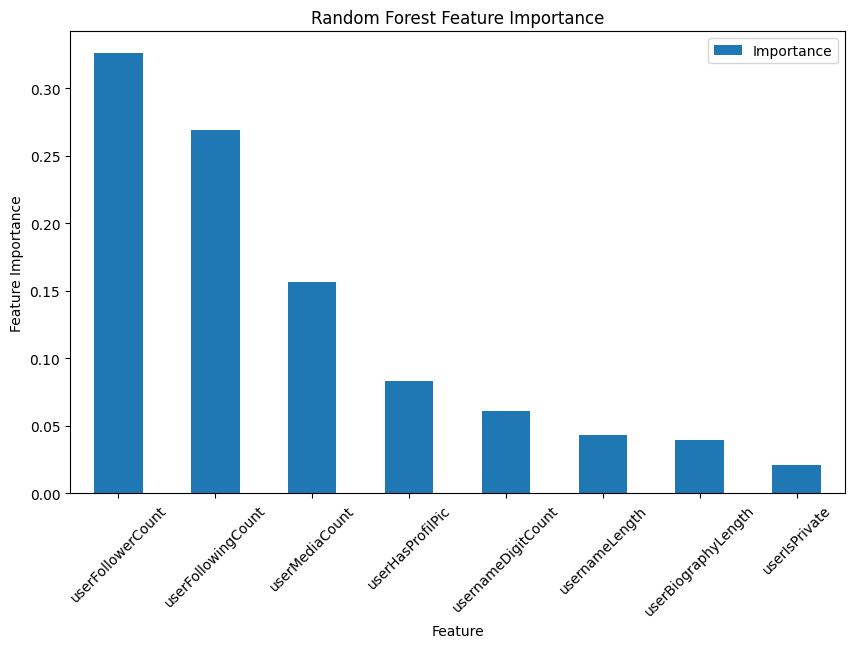

In [63]:
rf_feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_rf.feature_importances_
})

rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

xgb_importance_plot = rf_feature_importance_df.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)

### Cross Validation

In [64]:
final_rf = RandomForestClassifier(random_state=4)

In [65]:
from sklearn.model_selection import KFold, cross_val_score

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=4)

scores = cross_val_score(final_rf, X, np.ravel(Y), cv=kf, scoring="accuracy")
recall = cross_val_score(final_rf, X, np.ravel(Y), cv=kf, scoring="recall")
precision = cross_val_score(final_rf, X, np.ravel(Y), cv=kf, scoring="precision")
f1 = cross_val_score(final_rf, X, np.ravel(Y), cv=kf, scoring="f1")
auc = cross_val_score(final_rf, X, np.ravel(Y), cv=kf, scoring="roc_auc")

specificity_scorer = make_scorer(recall_score, pos_label=0)
specificity = cross_val_score(final_rf, X, np.ravel(Y), cv=kf, scoring=specificity_scorer)

print(f"Avg K-Fold accuracy: {np.mean(scores)}")
print(f"Avg K-Fold precision: {np.mean(precision)}")
print(f"Avg K-Fold recall: {np.mean(recall)}")
print(f"Avg K-Fold specificity: {np.mean(specificity)}")
print(f"Avg K-Fold f1: {np.mean(f1)}")
print(f"Avg K-Fold auc: {np.mean(auc)}")


Avg K-Fold accuracy: 0.9664920361450019
Avg K-Fold precision: 0.9193185618729098
Avg K-Fold recall: 0.8699721213871243
Avg K-Fold specificity: 0.9848999638821043
Avg K-Fold f1: 0.8928125319461809
Avg K-Fold auc: 0.9909083682615696


## SVM

### COLAB Setup

In [66]:
import os

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [67]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/CS3540-Final-Project/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['ToDos.md', 'LICENSE', 'README.md', 'realAccountData.json', 'fakeAccountData.json', 'DataManip.ipynb', 'LogisticRegression.ipynb', 'NeuralNetwork.ipynb', 'RandomForest.ipynb', 'Unsupervised.ipynb', 'XGBoost.ipynb', 'SVM.ipynb', 'Combined.ipynb']


In [68]:

import json

with open(f'{GOOGLE_DRIVE_PATH}realAccountData.json', 'r') as f:
            realData = json.load(f)
with open(f'{GOOGLE_DRIVE_PATH}fakeAccountData.json', 'r') as f:
            fakeData = json.load(f)
allData = realData + fakeData


### Setup

In [69]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.svm import SVC
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

In [70]:
# setting a random seed for reproducibility
import random

random.seed(4)

# number of iterations for alg that takes iterations
ITERCOUNT = 100000

In [71]:
random.shuffle(allData)

### SVM

In [72]:
allData_df = pd.DataFrame(allData)

allData_df.insert(0, 'Ones', 1)
cols = allData_df.shape[1]
X = allData_df.iloc[:,0:cols-1]
Y = allData_df.iloc[:,cols-1:cols]
Y = np.ravel(Y)

display(allData_df)

,Ones,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,1,65,67,79,116,1,0,0,8,0
1,1,219,337,0,0,1,1,1,7,0
2,1,252,509,0,28,1,1,0,11,0
3,1,58,2132,0,0,0,0,0,14,1
4,1,452,481,0,82,1,1,0,6,0
...,...,...,...,...,...,...,...,...,...,...
1189,1,234,658,93,2,1,0,0,14,0
1190,1,846,743,22,38,1,0,0,12,0
1191,1,384,219,51,11,1,1,0,12,0
1192,1,323,405,0,69,1,1,0,10,0


In [73]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=4)
y_train_array = np.ravel(y_train)

### Tuning the SVM

In [74]:
kernels = ["linear", "poly", "sigmoid"]
svms = {}
for kernel in kernels:
    if kernel == "poly":
        for degree in range(2,7):
            svms[f"{kernel}{degree}"] = SVC(random_state=4, kernel=kernel, degree=degree)
    elif kernel == "sigmoid":
        for coef in range(4):
            svms[f"{kernel}{coef}"] = SVC(random_state=4, kernel=kernel, coef0=coef)
    else:
        svms[kernel] = SVC(random_state=4, kernel=kernel, degree=3)

In [75]:
for kernel in svms.keys():
    trained_svm = svms[kernel].fit(x_train, y_train_array)
    print(f"{kernel} accuracy : {trained_svm.score(x_test, y_test)}")

linear accuracy : 0.9498327759197325
poly2 accuracy : 0.9297658862876255
poly3 accuracy : 0.9331103678929766
poly4 accuracy : 0.9130434782608695
poly5 accuracy : 0.9230769230769231
poly6 accuracy : 0.919732441471572
sigmoid0 accuracy : 0.9096989966555183
sigmoid1 accuracy : 0.9297658862876255
sigmoid2 accuracy : 0.9264214046822743
sigmoid3 accuracy : 0.8260869565217391


### Training the linear SVM

In [76]:
svm_model = SVC(random_state=4, kernel="linear")
svm = svm_model.fit(x_train, y_train_array)

svm.score(x_test, y_test)

0.9498327759197325

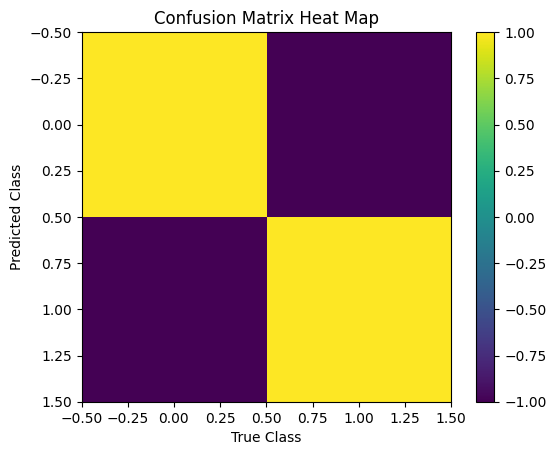

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       246
           1       0.91      0.79      0.85        53

    accuracy                           0.95       299
   macro avg       0.93      0.89      0.91       299
weighted avg       0.95      0.95      0.95       299



In [77]:
y_test_array = np.ravel(y_test)
svm_pred = svm.predict(X = x_test)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = svm_pred)
conf_matrix_scaler = preprocessing.StandardScaler().fit(conf_matrix)
conf_matrix_scaled = conf_matrix_scaler.transform(conf_matrix)

plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

svm_report = classification_report(y_true = y_test, y_pred = svm_pred)
print(svm_report)



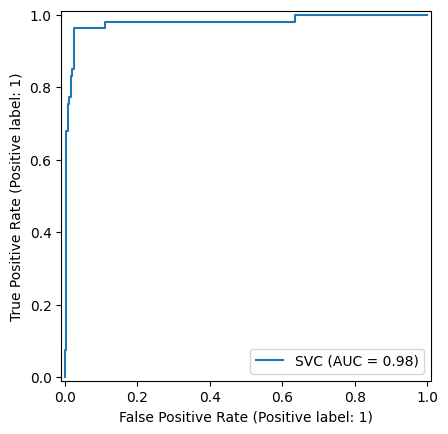

In [78]:
from sklearn.metrics import RocCurveDisplay
svm_roc_disp = RocCurveDisplay.from_estimator(svm, x_test, y_test)
plt.show()

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.decision_function(x_test))

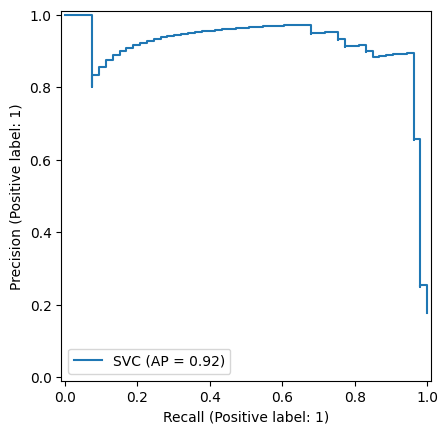

In [79]:
from sklearn.metrics import PrecisionRecallDisplay
svm_prc_disp = PrecisionRecallDisplay.from_estimator(svm, x_test, y_test)
plt.show()

### Cross Validation

In [80]:
svm_model = SVC(random_state=4, kernel="linear")

In [81]:
from sklearn.model_selection import KFold, cross_val_score

k = 2
kf = KFold(n_splits=k, shuffle=True, random_state=4)

scores = cross_val_score(svm_model, X, Y, cv=kf, scoring="accuracy")

print(f"Avg K-Fold accuracy: {np.mean(scores)}")

Avg K-Fold accuracy: 0.9472361809045227


In [82]:
# svm_model = SVC(random_state=4, kernel="linear")

In [83]:
# from sklearn.model_selection import KFold, cross_val_score

# k = 5
# kf = KFold(n_splits=k, shuffle=True, random_state=4)

# scores = cross_val_score(svm_model, X, Y, cv=kf, scoring="accuracy")
# recall = cross_val_score(svm_model, X, Y, cv=kf, scoring="recall")
# precision = cross_val_score(svm_model, X, Y, cv=kf, scoring="precision")
# f1 = cross_val_score(svm_model, X, Y, cv=kf, scoring="f1")
# auc = cross_val_score(svm_model, X, Y, cv=kf, scoring="roc_auc")

# specificity_scorer = make_scorer(recall_score, pos_label=0)
# specificity = cross_val_score(svm_model, X, Y, cv=kf, scoring=specificity_scorer)

# print(f"Avg K-Fold accuracy: {np.mean(scores)}")
# print(f"Avg K-Fold precision: {np.mean(precision)}")
# print(f"Avg K-Fold recall: {np.mean(recall)}")
# print(f"Avg K-Fold specificity: {np.mean(specificity)}")
# print(f"Avg K-Fold f1: {np.mean(f1)}")
# print(f"Avg K-Fold auc: {np.mean(auc)}")

## Unsupervised Learning with PCA and K Means

### COLAB Setup

In [84]:
import os

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [85]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/CS3540-Final-Project/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['ToDos.md', 'LICENSE', 'README.md', 'realAccountData.json', 'fakeAccountData.json', 'DataManip.ipynb', 'LogisticRegression.ipynb', 'NeuralNetwork.ipynb', 'RandomForest.ipynb', 'Unsupervised.ipynb', 'XGBoost.ipynb', 'SVM.ipynb', 'Combined.ipynb']


### Setup

In [86]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [87]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [88]:
# import os

# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/Final Project/'
# GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
# print(os.listdir(GOOGLE_DRIVE_PATH))

In [89]:
# Random seed for reproducibility
import random

random.seed(4)

### Principal Component Analysis

#### Data Preprocessing

In [90]:
# Fetching the data
real_df = pd.read_json(f'{GOOGLE_DRIVE_PATH}realAccountData.json')
fake_df = pd.read_json(f'{GOOGLE_DRIVE_PATH}fakeAccountData.json')

# Concatenate the two datasets
df = pd.concat([real_df, fake_df], ignore_index=True)

# Remove categorical variables for PCA
df_pca = df.drop(["userHasProfilPic", "userIsPrivate"], axis=1)

# Display the first 10 rows
df_pca.head(10)

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,usernameDigitCount,usernameLength,isFake
0,258,238,0,0,0,10,0
1,263,482,30,29,0,8,0
2,51,78,9,0,0,10,0
3,297,480,22,25,2,9,0
4,113,242,0,95,0,10,0
5,545,995,26,340,0,8,0
6,52,121,0,30,0,9,0
7,1038,6640,0,156,0,12,0
8,172,227,51,10,0,10,0
9,101,114,14,4,0,15,0


In [91]:
X = df_pca.drop('isFake', axis=1)
Y = df_pca['isFake'].astype('category')

# Standardizing continuous variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Define the PCA Model

In [92]:
# Define PCA model
pca = PCA(n_components=5)
# Fit PCA on training data
pca.fit(X_scaled)
# Transform both training and testing data
x_pca = pca.transform(X_scaled)

#### Explained Variace

In [93]:
# Explained variance ratios
explained_variance = pca.explained_variance_ratio_

# Put into a dataframe for plotting
explained_var_df = pd.DataFrame({
    'Principal Component': ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
    'Explained Variance Ratio': explained_variance
})

#### Visualize

Text(0, 0.5, 'PC2')

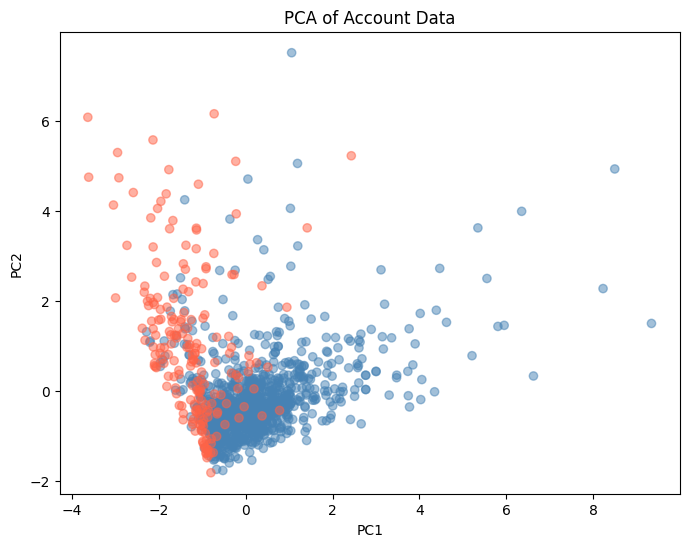

In [94]:
# Scatterplot of PCA results
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.5, c=['tomato' if label else 'steelblue' for label in Y])
plt.title('PCA of Account Data')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'Explained Variance Ratio')

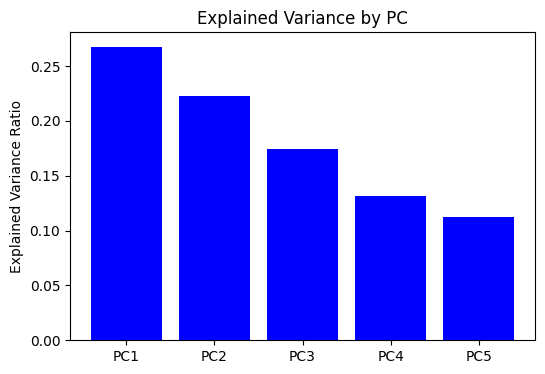

In [95]:
# Bar Plot of Explained Variance Ratios
plt.figure(figsize=(6,4))
plt.bar(explained_var_df['Principal Component'], explained_var_df['Explained Variance Ratio'], color='blue')
plt.title('Explained Variance by PC')
plt.ylabel('Explained Variance Ratio')

### K-Means Clustering

#### Define the Model

In [96]:
# K-Means Clustering (K=2)
kmeans = KMeans(n_clusters=2, random_state=8)
kmeans.fit(x_pca)

KMeans(n_clusters=2, random_state=8)

#### Visualize Clusters

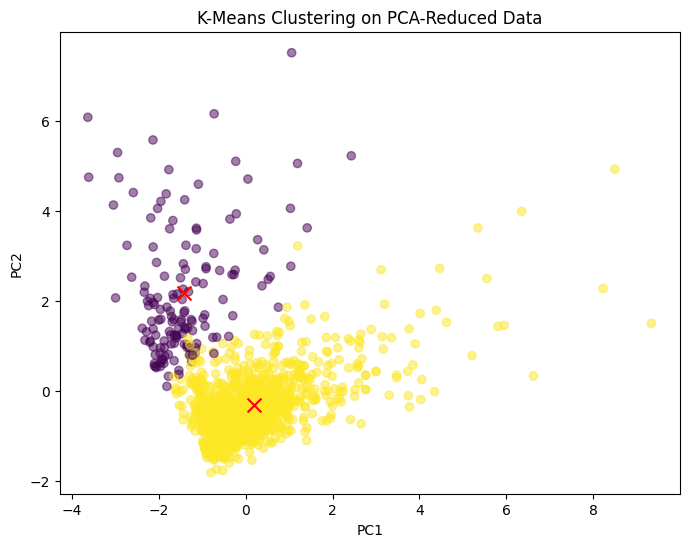

In [97]:
# Scatterplot of K-Means Clustering results
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='x')  # Plot cluster centers
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## XGBoost

### COLAB Setup

In [98]:
import os

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [99]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/CS3540-Final-Project/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['ToDos.md', 'LICENSE', 'README.md', 'realAccountData.json', 'fakeAccountData.json', 'DataManip.ipynb', 'LogisticRegression.ipynb', 'NeuralNetwork.ipynb', 'RandomForest.ipynb', 'Unsupervised.ipynb', 'XGBoost.ipynb', 'SVM.ipynb', 'Combined.ipynb']


### Setup

In [100]:
#imports
# load needed libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc, precision_score, recall_score

# sklearn models
import xgboost as xgb

In [101]:
#setting a random seed for reproducibility
import random
random.seed(4)

In [102]:
#getting the data
realData = pd.read_json(f'{GOOGLE_DRIVE_PATH}realAccountData.json')
fakeData = pd.read_json(f'{GOOGLE_DRIVE_PATH}fakeAccountData.json')

allData = pd.concat([realData, fakeData], ignore_index=True)

### XGBoost

In [103]:
num_cols = allData.shape[1]
X = allData.iloc[:,0:num_cols-1] # iloc slicing function
Y = allData.iloc[:,num_cols-1:num_cols]
Y = np.ravel(Y)

display(allData)

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,258,238,0,0,1,0,0,10,0
1,263,482,30,29,1,1,0,8,0
2,51,78,9,0,1,1,0,10,0
3,297,480,22,25,1,1,2,9,0
4,113,242,0,95,1,1,0,10,0
...,...,...,...,...,...,...,...,...,...
1189,0,25,138,6,1,0,0,10,1
1190,0,0,52,6,1,0,3,7,1
1191,0,1,92,9,1,0,1,15,1
1192,1,0,60,5,1,0,1,13,1


In [104]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)

In [105]:
boost_model = xgb.XGBClassifier(objective="binary:logistic")
boost_fit = boost_model.fit(x_train, y_train)
boost_score = boost_fit.score(x_test, y_test)

print(f"Model Accuracy: {boost_score:.2}")

Model Accuracy: 0.97


In [106]:
#function that you will use to convert confusion matrix to dataframe, useful for visulization.
def conf_matrix_to_df(conf_matrix, target_names):
    return pd.DataFrame(conf_matrix, columns=target_names, index=target_names)

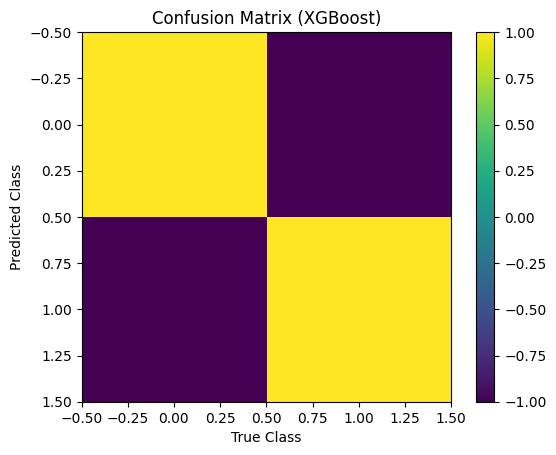

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       257
           1       0.83      0.95      0.89        42

    accuracy                           0.97       299
   macro avg       0.91      0.96      0.93       299
weighted avg       0.97      0.97      0.97       299



In [107]:
# Model Results
from sklearn.preprocessing import StandardScaler

y_test_array = np.ravel(y_test)
boost_predicted = boost_model.predict(X = x_test)

conf_matrix = confusion_matrix(y_true = y_test, y_pred = boost_predicted)
conf_matrix_scaler = StandardScaler().fit(conf_matrix)
conf_matrix_scaled = conf_matrix_scaler.transform(conf_matrix)


# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix (XGBoost)')
plt.imshow(conf_matrix_scaled)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

boost_classification_report = classification_report(y_true = y_test, y_pred = boost_predicted)
print(boost_classification_report)

In [108]:
# Classification Report (Manual)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")

specificity: 0.9688715953307393
recall: 0.9523809523809523
precision: 0.8333333333333334
accuracy: 0.9665551839464883


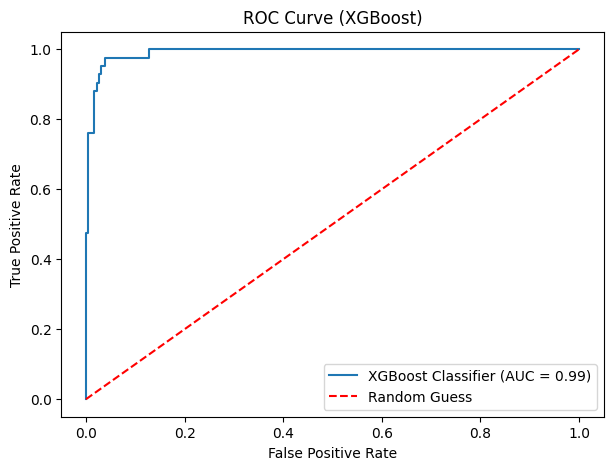

XGBoost Classifier ROC-AUC: 0.991106170094497


In [109]:
# ROC Curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
# other option for how things could work
y_score = boost_model.predict_proba(x_test)[:, 1]
fpr_boost, tpr_boost, _ = roc_curve(y_test, y_score)
boost_roc_auc = auc(fpr_boost, tpr_boost)

plt.figure(figsize=(7, 5))
plt.plot(fpr_boost, tpr_boost, label=f'XGBoost Classifier (AUC = {boost_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend()
plt.show()

print(f"XGBoost Classifier ROC-AUC: {boost_roc_auc}")


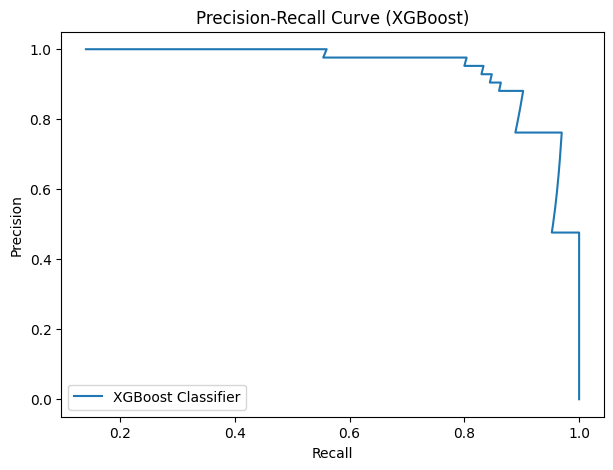

XGBoost Classifier Precision: 0.8333333333333334
XGBoost Classifier Recall: 0.9523809523809523


In [110]:
# Precision-Recall Curve
y_score = boost_model.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_score)
boost_precision_score = precision_score(y_test, boost_predicted)
boost_recall_score = recall_score(y_test, boost_predicted)

plt.figure(figsize=(7, 5))
plt.plot(precision, recall, label=f'XGBoost Classifier')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost)')
plt.legend()
plt.show()

print(f"XGBoost Classifier Precision: {boost_precision_score}")
print(f"XGBoost Classifier Recall: {boost_recall_score}")


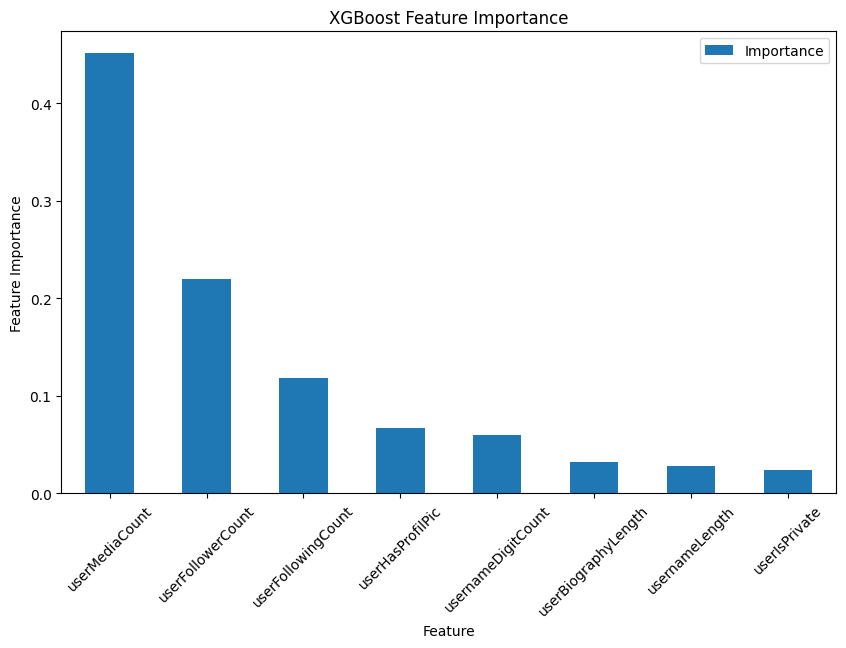

In [111]:
xgb_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': boost_model.feature_importances_
})

xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)

xgb_importance_plot = xgb_importance_df.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
plt.title('XGBoost Feature Importance')
plt.ylabel('Feature Importance')
plt.xticks(rotation=45)
plt.show()

### Cross Validation

In [112]:
boost_model = xgb.XGBClassifier(objective="binary:logistic")

In [113]:
from sklearn.model_selection import KFold, cross_val_score

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=4)

scores = cross_val_score(boost_model, X, np.ravel(Y), cv=kf, scoring="accuracy")
recall = cross_val_score(boost_model, X, np.ravel(Y), cv=kf, scoring="recall")
precision = cross_val_score(boost_model, X, np.ravel(Y), cv=kf, scoring="precision")
f1 = cross_val_score(boost_model, X, np.ravel(Y), cv=kf, scoring="f1")
auc = cross_val_score(boost_model, X, np.ravel(Y), cv=kf, scoring="roc_auc")

specificity_scorer = make_scorer(recall_score, pos_label=0)
specificity = cross_val_score(boost_model, X, np.ravel(Y), cv=kf, scoring=specificity_scorer)

print(f"Avg K-Fold accuracy: {np.mean(scores)}")
print(f"Avg K-Fold precision: {np.mean(precision)}")
print(f"Avg K-Fold recall: {np.mean(recall)}")
print(f"Avg K-Fold specificity: {np.mean(specificity)}")
print(f"Avg K-Fold f1: {np.mean(f1)}")
print(f"Avg K-Fold auc: {np.mean(auc)}")


Avg K-Fold accuracy: 0.9664955521957737
Avg K-Fold precision: 0.9002539940785919
Avg K-Fold recall: 0.9091751116922742
Avg K-Fold specificity: 0.9790990710118208
Avg K-Fold f1: 0.8999021795352926
Avg K-Fold auc: 0.9905261773769812


# Combined Results

## Supervised Models

In [114]:
# Create ROC Dataframe for each model (Supervised)

# Logistic Regression
logistic_roc_df = pd.DataFrame({
    "TPR": tpr_logistic,
    "FPR": fpr_logistic,
    "Model": "Logistic Regression"
})

# SVM
svm_roc_df = pd.DataFrame({
    "TPR": tpr_svm,
    "FPR": fpr_svm,
    "Model": "SVM"
})

# XGBoost
boost_roc_df = pd.DataFrame({
    "TPR": tpr_boost,
    "FPR": fpr_boost,
    "Model": "XGBoost"
})

# Random Forest
rf_roc_df = pd.DataFrame({
    "TPR": tpr_rf,
    "FPR": fpr_rf,
    "Model": "Random Forest"
})

# Combined each dataset
all_roc_df = pd.concat([logistic_roc_df, svm_roc_df, boost_roc_df, rf_roc_df], ignore_index=True)


In [115]:
# Using seaborn now
import altair as alt

combined_roc_plot = alt.Chart(all_roc_df).mark_line(opacity=0.75, size=2).encode(
    x=alt.X('FPR', title='False Positive Rate'),
    y=alt.Y('TPR', title='True Positive Rate'),
    color=alt.Color('Model', legend=alt.Legend(orient="bottom-right"))
).properties(
    width=600,
    height=400,
    title="ROC Curve for Supervised Models"
).configure_legend(
    titleFontSize=15,
    labelFontSize=17
).interactive()

combined_roc_plot

alt.Chart(...)

## Neural Networks

In [116]:
nn1_roc_df = pd.DataFrame({
    "TPR": tpr1_nn,
    "FPR": fpr1_nn,
    "Model": "1 Layer"
})

nn2_roc_df = pd.DataFrame({
    "TPR": tpr2_nn,
    "FPR": fpr2_nn,
    "Model": "2 Layers"
})

nn3_roc_df = pd.DataFrame({
    "TPR": tpr3_nn,
    "FPR": fpr3_nn,
    "Model": "5 Layers"
})

nn4_roc_df = pd.DataFrame({
    "TPR": tpr4_nn,
    "FPR": fpr4_nn,
    "Model": "10 Layers"
})

combined_nn_roc_df = pd.concat([nn1_roc_df, nn2_roc_df, nn3_roc_df, nn4_roc_df], ignore_index=True)

In [117]:
# Combined ROC Curve (Altair)
import altair as alt

legend_order = ['1 Layer', '2 Layers', '5 Layers', '10 Layers']

combined_nn_roc_plot = alt.Chart(combined_nn_roc_df).mark_line(size=2, opacity=0.75).encode(
    x=alt.X('FPR', title='False Positive Rate'),
    y=alt.Y('TPR', title='True Positive Rate'),
    color=alt.Color("Model", sort=legend_order, legend=alt.Legend(title="MLP", orient="bottom-right"))
).configure_legend(
    titleFontSize=15,
    labelFontSize=17
).properties(
    width=600,
    height=400,
    title="Combined ROC Curve for Neural Networks"
).interactive()

combined_nn_roc_plot

alt.Chart(...)